## NLP Course Work 
Individual Submission 

Name - Kowshik Kesavarapu                   
    
Group - 1   

### Named Entity Recognition 

Named Entity Recognition can be done in several different ways , I mainly want to explore how a prebuilt model like Spacy or NLTK works and how they may differ from trainig our own machine learning model like Perceptron, Multi layer Perceptron , CNN and several other works. 

The main objective for me is to figure out the best approach and also find and explore different models and data sets.

Named Entity can be defined as the word which has significant value . One way describe it is it's "Noun" in a sentance . It can be name of a person , Name of a city , Date , Organization name, Amount and much more.


Some of the most common Named Entities are 


| Entity Type | Description |Example|
| --- | --- |---|
|PERSON|Name of a person (Usually recognized as first name and last name|Kowshik Kesavarapu|
|NORP|Nationalities or Religious/Political Groups|India , UK|
|FAC|Facility Name |IFH , CERN |
|ORG|Organization Name |WHO|
|GPE|Geopolitical Entity|UN|
|LOC|location|Guildford|
|PRODUCT|Product Name |Google Pixel|
|EVENT|Event Name |Google I/O|
|WORK OF ART|Work of art|Picaso|
|LAW|A law that has been published|US Act XXXX|
|LANGUAGE|Language Name |Telugu , English|
|DATE|Date , I dosen't have to be exact date terms like yesterday are also comes under this |21/04/2002 , Tuesday|
|TIME|Time , It also usually considers terms like Afternoon , Evening|2:00PM . Tonight |
|PERCENT|Percentage|100|
|MONEY|Money|$100
|QUANTITY|Measurements of weight or distance|10 Kms|
|CARDINAL|A number, similar to quantity but not a measurement|25 Books (here 25 is Cardinal) |
|ORDINAL|A number, but signifying a relative position such as “first” or “second|First prize |

## NER Using Spacy

Considering an example to try different Methods 

This sentance has 4 Named Entities 
1) World Health Organisation - Organization 
2) African - NORP 
3) $100 Million - Money
4) Today - Date 

In [1]:
ex = 'World Health Organisation announced today that it is spending $100 Million dollars to help with corona virus vacccination is African Countries'

In [2]:
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

2022-04-28 20:47:13.751214: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-28 20:47:13.751248: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
def spacy_ner(sent):
    doc = nlp(sent)

    for ent in doc.ents:
        print(ent.text, ent.label_)

In [4]:
spacy_ner(ex)

World Health Organisation ORG
today DATE
$100 Million dollars MONEY
African NORP


This particular method is very intuitive and relatively easy to implement , We dont need to worry about Tokenization or any other pre processing , This works relatively well. It was able to find all the Named Entities. 

### NER using NLTK 

For NLTK we need tokenize and also tag POS using the pos_tag in nltk 

These tags are genrated using Penn Treebank Project.


The full forms of these tags are 

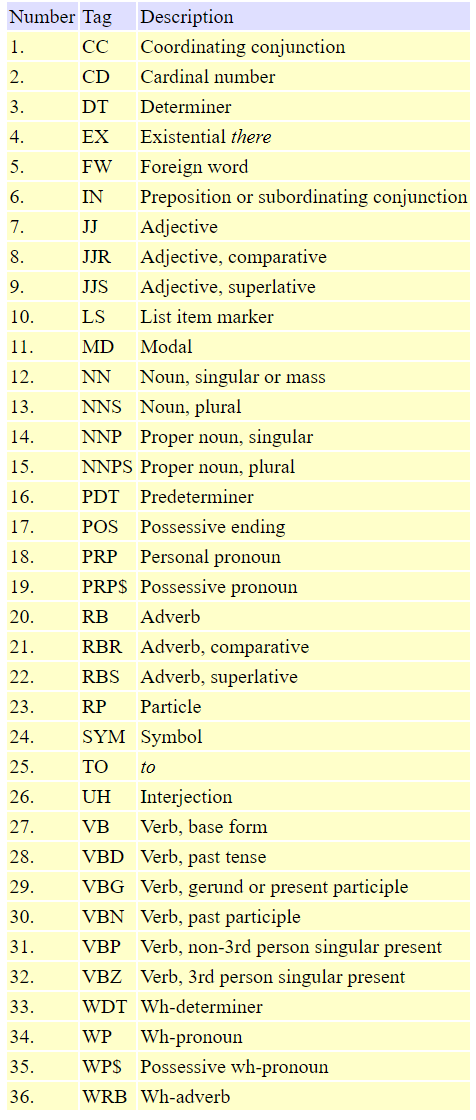


"Reference - https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html"

Once the sentance is Tokenized we can perform NER , I wrote a simple function to do all this when passed with the sentance 

We can perfoem NER and here we can see that 

Here we can see the sentance splitted and POS tagged 

In [5]:
import nltk
tokenized = nltk.word_tokenize(ex)#Tokenizing 
pos_tagged = nltk.pos_tag(tokenized)#Tagging POS 
print(pos_tagged)

[('World', 'NNP'), ('Health', 'NNP'), ('Organisation', 'NNP'), ('announced', 'VBD'), ('today', 'NN'), ('that', 'IN'), ('it', 'PRP'), ('is', 'VBZ'), ('spending', 'VBG'), ('$', '$'), ('100', 'CD'), ('Million', 'NNP'), ('dollars', 'NNS'), ('to', 'TO'), ('help', 'VB'), ('with', 'IN'), ('corona', 'JJ'), ('virus', 'NN'), ('vacccination', 'NN'), ('is', 'VBZ'), ('African', 'JJ'), ('Countries', 'NNS')]


In [6]:
def ner_nltk(sent):
    tokenized = nltk.word_tokenize(sent)#Tokenizing 
    pos_tagged = nltk.pos_tag(tokenized)#Tagging POS 
    chunks = nltk.ne_chunk(pos_tagged)#Performing NER
    for chunk in chunks:
        if hasattr(chunk, 'label'):
            print(chunk)

In [7]:
ner_nltk(ex)

(GPE African/JJ)


Here we can see that the NLTK havent performed well and was only able to find One entities. Although this seems to be not at all scientific way to compare from my research i found that Spacy often performs well than NLTK as it was trained on much larger data set.

Now there is also a another way of getting the NER this is by using The Text API which is a Text analysis model. 

### NER using Text API

In [8]:
import requests
import json
def text_api(text):
        
        headers = {
            "Content-Type": "application/json",
            "apikey": '6d8398eb-dd38-4e39-b28f-8ce00ff9c4d3'
        }
        body = {
            "text": text
        }
        url = "https://app.thetextapi.com/text/ner"

        response = requests.post(url, headers=headers, json=body)
        ner = json.loads(response.text)["ner"]
        print(ner)

In [9]:
text_api(ex)

[['ORG', 'World Health Organisation'], ['DATE', 'today'], ['MONEY', '$100 Million dollars'], ['ORG', 'African Countries']]


This is another way and for this example it performed relatively well and found all the Named entities 

Now that we covered three different relatively straight forward ways to do NER , Now i am going to experiment with building my own model by training using the dataset found on kaggle, Which contains the data of several thousand sentances along with their POS and NER tags.

### Exploring the Data Set

Data set is from Kaggle (https://www.kaggle.com/datasets/abhinavwalia95/entity-annotated-corpus) , It consists of sentances and Parts of Search and their named entitiesa 

In [10]:
import pandas as pd #Importing pandas and numpy 
import numpy as np

In [11]:
data = pd.read_csv('data.csv', encoding = "ISO-8859-1")
data = data[:100000]
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


This data set needs a little cleaning so i am just using ffill to fill the nan with previous found data.

In [12]:
data = data.fillna(method='ffill') 

In [13]:
data[20:30]

,Sentence #,Word,POS,Tag
20,Sentence: 1,from,IN,O
21,Sentence: 1,that,DT,O
22,Sentence: 1,country,NN,O
23,Sentence: 1,.,.,O
24,Sentence: 2,Families,NNS,O
25,Sentence: 2,of,IN,O
26,Sentence: 2,soldiers,NNS,O
27,Sentence: 2,killed,VBN,O
28,Sentence: 2,in,IN,O
29,Sentence: 2,the,DT,O


Here we can observe how the data is distributed . Now i will try to do some exploration of the data 

In [14]:
data['Sentence #'].nunique(), data.Word.nunique(), data.Tag.nunique()

(4544, 10922, 17)

Here we can see we have 4544 sentances , 10922 words and 17 tags , Lets see what the tags are 

In [15]:
Ner_Tag = data.groupby('Tag').size().reset_index(name='counts')
print(Ner_Tag)

      Tag  counts
0   B-art      75
1   B-eve      53
2   B-geo    3303
3   B-gpe    1740
4   B-nat      30
5   B-org    1876
6   B-per    1668
7   B-tim    1823
8   I-art      43
9   I-eve      47
10  I-geo     690
11  I-gpe      51
12  I-nat      11
13  I-org    1470
14  I-per    1846
15  I-tim     549
16      O   84725


This data set is not certainly a good data set as there is a possibility of overfitting and underfitting of the data as all the classes are not represented equally.So i will be carefull while building the models.

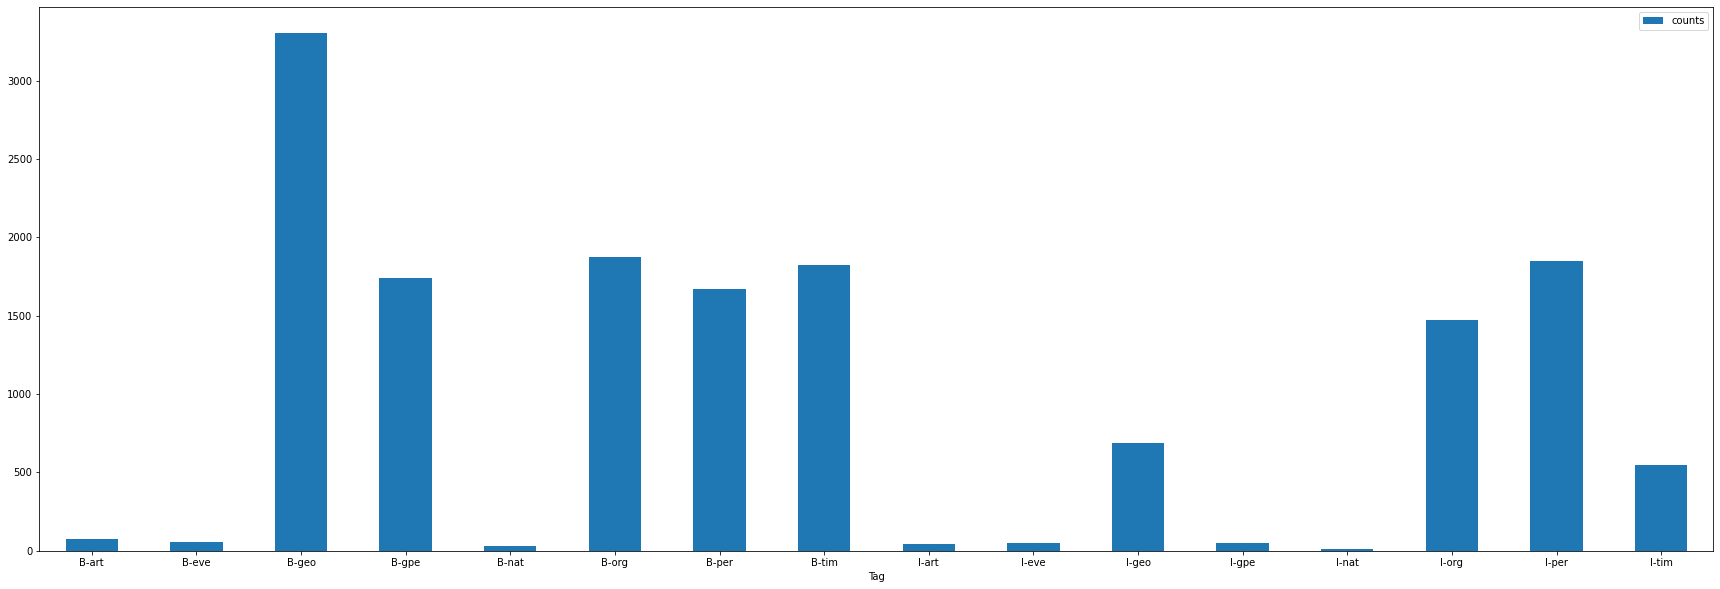

In [16]:
tags1=Ner_Tag[:-1] # removing "O" -other
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)
ax = tags1.plot.bar(x='Tag', y='counts', rot=0)

### Building the model

In [17]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

In [18]:
data = pd.read_csv('data.csv', encoding = "ISO-8859-1")
data = data.fillna(method='ffill')
data = data[:100000]#Using only a part of dataset as using more is creating Memory eroor.
y = data.Tag.values

In [19]:
v = DictVectorizer(sparse=False)
X= data.drop('Tag', axis=1)
X = v.fit_transform(X.to_dict('records'))

In [20]:
classes = np.unique(y)
classes = classes.tolist()
new_classes = classes.copy()
new_classes.pop()

'O'

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)

### Perceptron 

In [22]:
perceptron = Perceptron(verbose=10,max_iter=5)
perceptron.partial_fit(X_train, y_train, classes) #Fitting data to each different class of Tags 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 13.42, NNZs: 162, Bias: -4.000000, T: 67000, Avg. loss: 0.001642
Total training time: 1.62 seconds.
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


Norm: 11.53, NNZs: 113, Bias: -3.000000, T: 67000, Avg. loss: 0.001060
Total training time: 1.61 seconds.
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


Norm: 68.07, NNZs: 2642, Bias: -4.000000, T: 67000, Avg. loss: 0.041776
Total training time: 1.68 seconds.
-- Epoch 1


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.9s remaining:    0.0s


Norm: 49.90, NNZs: 1337, Bias: -4.000000, T: 67000, Avg. loss: 0.015328
Total training time: 1.64 seconds.
-- Epoch 1


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.6s remaining:    0.0s


Norm: 8.43, NNZs: 57, Bias: -3.000000, T: 67000, Avg. loss: 0.000567
Total training time: 1.79 seconds.
-- Epoch 1


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.4s remaining:    0.0s


Norm: 56.87, NNZs: 2044, Bias: -4.000000, T: 67000, Avg. loss: 0.034970
Total training time: 1.67 seconds.
-- Epoch 1


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.0s remaining:    0.0s


Norm: 48.83, NNZs: 1578, Bias: -4.000000, T: 67000, Avg. loss: 0.022328
Total training time: 1.65 seconds.
-- Epoch 1


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.7s remaining:    0.0s


Norm: 44.41, NNZs: 1127, Bias: -4.000000, T: 67000, Avg. loss: 0.017164
Total training time: 1.62 seconds.
-- Epoch 1


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   13.3s remaining:    0.0s


Norm: 10.44, NNZs: 106, Bias: -3.000000, T: 67000, Avg. loss: 0.001060
Total training time: 1.62 seconds.
-- Epoch 1


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   14.9s remaining:    0.0s


Norm: 11.45, NNZs: 96, Bias: -3.000000, T: 67000, Avg. loss: 0.000776
Total training time: 1.61 seconds.
-- Epoch 1
Norm: 35.13, NNZs: 803, Bias: -4.000000, T: 67000, Avg. loss: 0.011149
Total training time: 1.62 seconds.
-- Epoch 1
Norm: 11.00, NNZs: 102, Bias: -3.000000, T: 67000, Avg. loss: 0.001209
Total training time: 1.63 seconds.
-- Epoch 1
Norm: 6.24, NNZs: 31, Bias: -3.000000, T: 67000, Avg. loss: 0.000209
Total training time: 1.62 seconds.
-- Epoch 1
Norm: 53.57, NNZs: 1703, Bias: -4.000000, T: 67000, Avg. loss: 0.026224
Total training time: 1.64 seconds.
-- Epoch 1
Norm: 60.35, NNZs: 2091, Bias: -6.000000, T: 67000, Avg. loss: 0.026940
Total training time: 1.65 seconds.
-- Epoch 1
Norm: 30.53, NNZs: 672, Bias: -4.000000, T: 67000, Avg. loss: 0.012030
Total training time: 1.62 seconds.
-- Epoch 1
Norm: 73.89, NNZs: 2851, Bias: 4.000000, T: 67000, Avg. loss: 0.048866
Total training time: 1.68 seconds.


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   28.0s finished


Perceptron(max_iter=5, verbose=10)

In [23]:
classification_per = classification_report(y_pred=perceptron.predict(X_test), y_true=y_test, labels=new_classes)
per_acc_Train =accuracy_score(y_true=y_train, y_pred=perceptron.predict(X_train))
per_acc_Test =accuracy_score(y_true=y_test, y_pred=perceptron.predict(X_test)) 
print(classification_per)
print('Accuracy Score on Train data:', per_acc_Train)
print('Accuracy Score on Test data:', per_acc_Test)

              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        24
       B-eve       0.11      0.05      0.07        19
       B-geo       0.56      0.81      0.66      1085
       B-gpe       0.92      0.78      0.84       556
       B-nat       1.00      0.17      0.29        12
       B-org       0.39      0.52      0.44       589
       B-per       0.70      0.46      0.56       564
       B-tim       0.91      0.63      0.75       611
       I-art       0.00      0.00      0.00        12
       I-eve       0.67      0.22      0.33        18
       I-geo       0.75      0.42      0.54       230
       I-gpe       1.00      0.07      0.13        14
       I-nat       0.50      0.50      0.50         2
       I-org       0.48      0.50      0.49       445
       I-per       0.83      0.13      0.22       591
       I-tim       0.36      0.18      0.24       194

   micro avg       0.61      0.54      0.58      4966
   macro avg       0.57   

### Linear classifiers with SGD training

In [24]:
sgd_classifier = SGDClassifier()
sgd_classifier.partial_fit(X_train, y_train, classes)
classification_sgd = classification_report(y_pred=sgd_classifier.predict(X_test), y_true=y_test, labels=new_classes)
print(classification_sgd)
sgd_acc_train=accuracy_score(y_true=y_train, y_pred=sgd_classifier.predict(X_train))
sgd_acc_test= accuracy_score(y_true=y_test, y_pred=sgd_classifier.predict(X_test))
print('Accuracy Score on Train data:',sgd_acc_train )
print('Accuracy Score on Test data:', sgd_acc_test)

              precision    recall  f1-score   support

       B-art       0.60      0.12      0.21        24
       B-eve       0.00      0.00      0.00        19
       B-geo       0.65      0.82      0.73      1085
       B-gpe       0.90      0.62      0.73       556
       B-nat       0.00      0.00      0.00        12
       B-org       0.68      0.38      0.48       589
       B-per       0.70      0.46      0.55       564
       B-tim       0.92      0.63      0.75       611
       I-art       0.00      0.00      0.00        12
       I-eve       0.67      0.22      0.33        18
       I-geo       0.66      0.55      0.60       230
       I-gpe       1.00      0.14      0.25        14
       I-nat       0.00      0.00      0.00         2
       I-org       0.79      0.36      0.50       445
       I-per       0.44      0.82      0.57       591
       I-tim       0.31      0.02      0.04       194

   micro avg       0.66      0.58      0.62      4966
   macro avg       0.52   

### Naive Bayes classifier for multinomial models

In [25]:
naive_bayes = MultinomialNB(alpha=0.01)
naive_bayes.partial_fit(X_train, y_train, classes)
classification_naive_bayes = classification_report(y_pred=naive_bayes.predict(X_test), y_true=y_test, labels = new_classes)
print(classification_naive_bayes)
nb_acc_train =accuracy_score(y_true=y_train, y_pred=naive_bayes.predict(X_train))
nb_acc_test = accuracy_score(y_true=y_test, y_pred=naive_bayes.predict(X_test))
print('Accuracy Score on Train data:',nb_acc_train )
print('Accuracy Score on Test data:', nb_acc_test)

              precision    recall  f1-score   support

       B-art       0.06      0.17      0.09        24
       B-eve       0.33      0.37      0.35        19
       B-geo       0.70      0.63      0.66      1085
       B-gpe       0.70      0.83      0.76       556
       B-nat       0.35      0.50      0.41        12
       B-org       0.41      0.44      0.43       589
       B-per       0.44      0.47      0.46       564
       B-tim       0.56      0.61      0.59       611
       I-art       0.07      0.08      0.08        12
       I-eve       0.46      0.33      0.39        18
       I-geo       0.40      0.52      0.46       230
       I-gpe       0.13      0.14      0.14        14
       I-nat       0.00      0.00      0.00         2
       I-org       0.50      0.51      0.51       445
       I-per       0.53      0.50      0.51       591
       I-tim       0.17      0.27      0.21       194

   micro avg       0.52      0.56      0.54      4966
   macro avg       0.36   

### Using Bidirectional LSTM 

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('data.csv', encoding='latin1')
data = data.fillna(method='ffill')
data.head(10)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


### Retrieve sentences and corresponding tags

In [28]:
#This function will group and bind all the sentences 
class Sentence_Getter(object):
    def __init__(self, df):
        self.n_sent = 1
        self.df = df
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s['Word'].values.tolist(),
                                                          s['POS'].values.tolist(),
                                                          s['Tag'].values.tolist())]
        self.grouped = self.df.groupby('Sentence #').apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [29]:
decouple = Sentence_Getter(data)
sentences = decouple.sentences

In [30]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

### Define mappings between sentences and tags

In [31]:
words = list(set(data['Word'].values))
words.append('ENDPAD')
num_words = len(words)
tags = list(set(data['Tag'].values))
num_tags = len(tags)
word2idx = {w: i+1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

### Padding input sentences and creating train/test split

In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

maximum_len = 50
X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen = maximum_len, sequences = X, padding='post', value=num_words-1)

y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen = maximum_len, sequences = y, padding = 'post', value = tag2idx['O'])
y = [to_categorical(i, num_classes=num_tags) for i in y]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

### Build and compile a Bidirectional LSTM model

In [34]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [35]:
input_word = Input(shape=(maximum_len, ))
model = Embedding(input_dim = num_words, output_dim = maximum_len, input_length = maximum_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation='softmax'))(model)
model = Model(input_word, out)
model.summary()

2022-04-28 20:49:00.105091: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-28 20:49:00.105128: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-28 20:49:00.105155: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2022-04-28 20:49:00.105402: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            1758950   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 50)           0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 50, 200)          120800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 50, 17)           3417      
 ibuted)                                                         
                                                             

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

In [38]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=1, verbose=0, mode='max', restore_best_weights=False)
callbacks = [PlotLossesCallback(), early_stopping]

history = model.fit(
    x_train, np.array(y_train),
    validation_split=0.2,
    batch_size = 64,
    epochs = 5,
    verbose = 1,
)

Epoch 1/5
540/540 [==============================] - 70s 122ms/step - loss: 0.2733 - accuracy: 0.9428 - val_loss: 0.1213 - val_accuracy: 0.9668
Epoch 2/5
540/540 [==============================] - 65s 121ms/step - loss: 0.0786 - accuracy: 0.9781 - val_loss: 0.0594 - val_accuracy: 0.9824
Epoch 3/5
540/540 [==============================] - 65s 121ms/step - loss: 0.0471 - accuracy: 0.9862 - val_loss: 0.0520 - val_accuracy: 0.9844
Epoch 4/5
540/540 [==============================] - 66s 121ms/step - loss: 0.0375 - accuracy: 0.9887 - val_loss: 0.0488 - val_accuracy: 0.9851
Epoch 5/5
540/540 [==============================] - 65s 121ms/step - loss: 0.0320 - accuracy: 0.9901 - val_loss: 0.0486 - val_accuracy: 0.9854


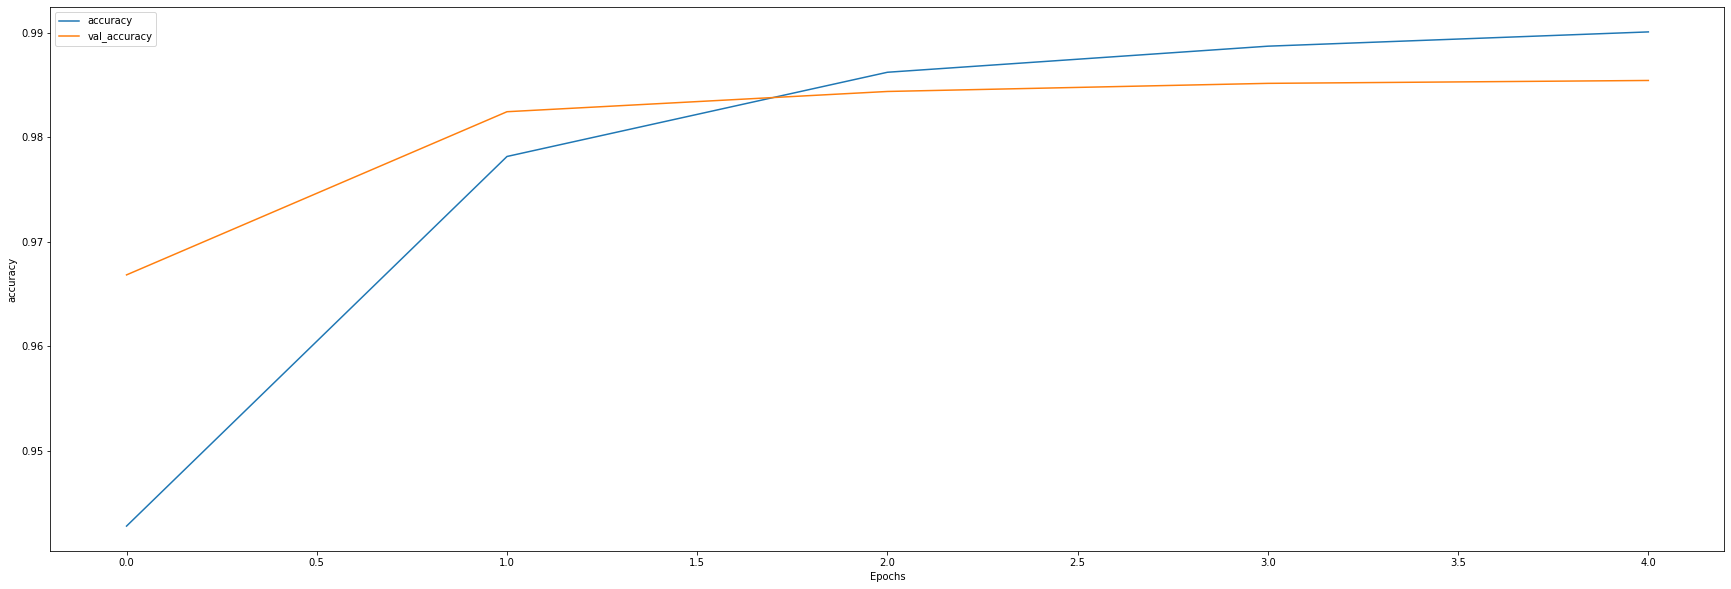

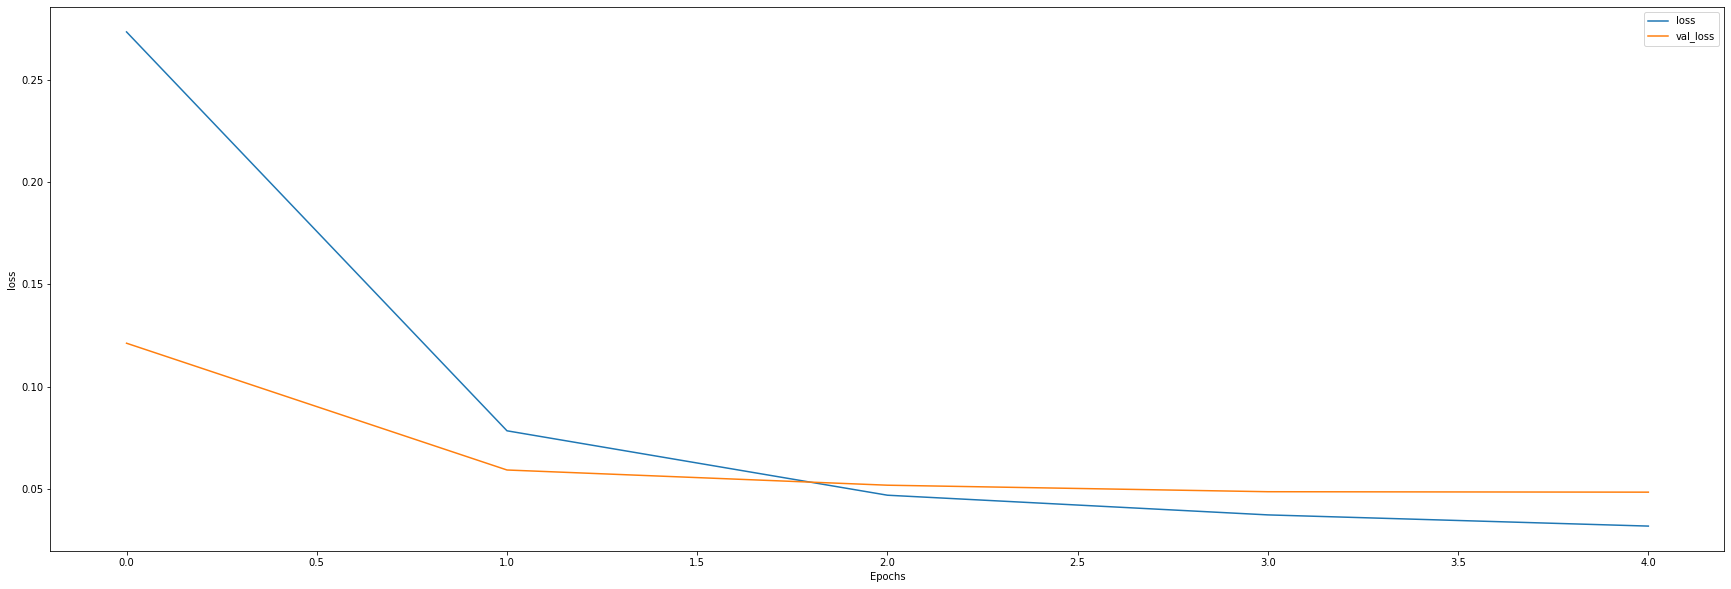

In [39]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss");

Here we can see the model is able to get to accuracy of more than 98.5 % which is very good

In [ ]:
model.evaluate(x_test, np.array(y_test))
lstm_acc=np.array(y_test)

150/150 [==============================] - 2s 16ms/step - loss: 0.0520 - accuracy: 0.9851


So we have used 3 Straight forward ways to predict the NER 

    1 - SPACY
    2 - NLTK
    3 - TEXT API 
Then we have used 4 different models to train 


    1 - Perceptron
    2 - SGD
    3 - Naive Bayes 
    4 - LSTM 


Now we have a data on accuracy on how the trained models performed lets see how all the 4 models performed 


In [41]:
print('Accuracy of Perceptron :', round(per_acc_Test*100))
print('Accuracy of SGD :', round(sgd_acc_test*100))
print('Accuracy of Naive Bayes :', round(nb_acc_test*100))
print ("Accuracy of LSTM: " , round(lstm_acc*100))

Accuracy of Perceptron : 93
Accuracy of SGD : 93
Accuracy of Naive Bayes : 91
Accuracy of LSTM:  99


Here we can see LSTM performed very well compared to the others , And yes this may be due to the fact lstm is trained with much larger data compared to other three but in my experimentation even when trained with much lesser data lstm performed well. 

Now i want to see how LSTM performs compared to the best pre built model (in my opinion ) SPACY and other methods as well lets see how they perform when compared to each other 

In [42]:
def make_sentance (sent) :  # Takes a array of words and returns a setance so can be used to evaluate using SPACY 
    length = len(sent)
    for i in range(length) :
        if i == 0 :
            final = sent[i]
        else :
            final = final +" "+ sent[i]
    return final + " ."


In [43]:
def expermnt (count,nltk_flag,text_flag):
    for z in range(count):
            print("-"*15,z+1,"-"*15)
            i = np.random.randint(0, x_test.shape[0]) # Getting a random sentance number 
            p = model.predict(np.array([x_test[i]])) #Predicting using LSTM 
            p = np.argmax(p, axis=-1) # Conberting from vectoers to tag
            random_sent = []
            r_sent = ''
            y_true = np.argmax(np.array(y_test), axis=-1)[i] 
            print ("Using LSTM")
            print('-'*30)
            print('{:15}{:5}\t {}'.format('Word', 'True', 'Pred'))
            print('-'*30)
            for w, true, pred in zip(x_test[i], y_true, p[0]):
                if (words[w-1] == '.'):
                    break
                else :
                    print('{:15}{}\t{}'.format(words[w-1], tags[true], tags[pred]))
                    random_sent.append(words[w-1])
            r_sent = make_sentance(random_sent)
            print('-'*30)
            print ("Using Spacy")
            print('-'*30)
            spacy_ner(r_sent)
            if (nltk_flag ==1 ) :
                print('-'*30)
                print(" Using NLTK\n")
                print('-'*30)
                ner_nltk(r_sent)
            if (text_flag ==1 ) :
                print('-'*30)
                print("Using text\n") 
                text_api(r_sent)
                print('-'*30)

In [44]:
expermnt(2,1,1)

--------------- 1 ---------------
Using LSTM
------------------------------
Word           True 	 Pred
------------------------------
Afghan         B-gpe	B-gpe
officials      O	O
say            O	O
a              O	O
roadside       O	O
bomb           O	O
killed         O	O
six            O	O
civilians      O	O
and            O	O
wounded        O	O
nine           O	O
others         O	O
Sunday         B-tim	B-tim
in             O	O
southern       O	B-geo
Kandahar       B-geo	I-geo
province       O	O
------------------------------
Using Spacy
------------------------------
Afghan NORP
six CARDINAL
nine CARDINAL
Sunday DATE
Kandahar GPE
------------------------------
 Using NLTK

------------------------------
(GPE Afghan/NNP)
------------------------------
Using text

[['DATE', 'Sunday']]
------------------------------
--------------- 2 ---------------
Using LSTM
------------------------------
Word           True 	 Pred
------------------------------
Officials      O	O
are            O	O

After running the above experiment several times i am confident to say that Spacy one of the best way to do the NER as it was fast and often produces almost same or better results than the LSTM. LSTM does have its benifits like it was able to find the begin of the entity and end of the entity but spacy usually gives all the words as one entity which is convinient. 


In conclusion i would say if the model is trained with large amount of data i performs very well but i would prefer using SPACY as it was way easier to implement .

References  - 

1 - Dipanjan Sarkar. "Text Analytics with Python" Text Book 


2 - Kaggle Data set https://www.kaggle.com/datasets/abhinavwalia95/entity-annotated-corpus



3 - NER -  https://towardsdatascience.com/named-entity-recognition-ner-meeting-industrys-requirement-by-applying-state-of-the-art-deep-698d2b3b4ede?gi=9de7da42bd43



4 - NER using  LSTM - https://www.depends-on-the-definition.com/lstm-with-char-embeddings-for-ner/